In [ ]:
https://python.plainenglish.io/scrape-everythings-from-instagram-using-python-39b5a8baf2e5

In [3]:
import pandas as pd
filename = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/BD/logs_v2.csv'
df = pd.read_csv(filename, sep=',', encoding='utf8')
df.head()

C:\Users\Casa\AppData\Local\Temp\ipykernel_9396\2924385374.py:3: DtypeWarning: Columns (7,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep=',', encoding='utf8')


,id,createTime,hashtags,tags,tags_full_name,tags_verified,isPaidPartnership,text,productType,InstagramUserId,...,s_tags,s_tags_full_name,s_tags_verified,mediaType,productType.1,InstagramUserId.1,fullName,username,isVerified,country
0,6822,2022-06-20 20:53:25+00,NaN,NaN,NaN,NaN,False,NaN,story,149,...,NaN,NaN,NaN,2,story,149,ᴘᴀʀᴛ ᴛɪᴍᴇ ᴘᴏᴇᴛ 🇮🇪,conorryan75,False,ireland
1,6824,2022-06-20 20:53:26+00,NaN,NaN,NaN,NaN,False,NaN,story,149,...,NaN,NaN,NaN,2,story,149,ᴘᴀʀᴛ ᴛɪᴍᴇ ᴘᴏᴇᴛ 🇮🇪,conorryan75,False,ireland
2,6825,2022-06-20 20:53:27+00,NaN,NaN,NaN,NaN,False,NaN,story,149,...,NaN,NaN,NaN,2,story,149,ᴘᴀʀᴛ ᴛɪᴍᴇ ᴘᴏᴇᴛ 🇮🇪,conorryan75,False,ireland
3,6922,2022-06-20 14:26:26+00,NaN,NaN,NaN,NaN,False,NaN,story,157,...,NaN,NaN,NaN,2,story,157,Laura Broderick,laurab_mua,False,ireland
4,6972,2022-06-21 08:02:49+00,NaN,NaN,NaN,NaN,False,NaN,story,158,...,NaN,NaN,NaN,2,story,158,𝐉𝐎𝐀𝐍𝐍𝐄 𝐋𝐀𝐑𝐁𝐘,joannelarby,True,ireland


In [27]:
len(df)

147893

In [4]:
import datetime as dt
df['createTime'] = pd.to_datetime(df['createTime'])
#Acrestar mais coluna de tempo, como (1) dia, (2) quarter, (3) data Y-m-d (4) hora do dia (5) minutos
df['year'] = pd. DatetimeIndex(df['createTime']).year
df['month'] = pd. DatetimeIndex(df['createTime']).month
df['day'] = pd. DatetimeIndex(df['createTime']).day
df['quarter'] = df['createTime'].dt.quarter
#On Week day zero will be Monday... sunday will be 7
df['weekday'] = df['createTime'].dt.weekday
#returns the weeknumber
df['weeknum'] = df['createTime'].dt.strftime("%V")
df['year_month'] = pd.to_datetime(df["createTime"].dt.strftime('%Y-%m'))
df['date']=df['year'].astype(str) +'_'+ df['quarter'].astype(str) 
df['month_year']=df['year'].astype(str) +'_'+ df['month'].astype(str) 

### 1.1 First try SNA sample
Building a network of tags referenced hand in hand per post, repeating atgs per post

In [2]:
df_try=df[["InstagramUserId.1","tags"]].copy()
df_try=df_try.dropna()
df_try.head(5)

,InstagramUserId.1,tags
168,258,warnerbrosirl
170,258,warnerbrosirl
244,206,greeensaregoodforyou
306,258,meagherspharmacy;oonaghohag;symproveyourlife
346,206,rimmellondonuki


In [3]:
#Lets Split the data frame to obtain and split of the table
df_try_3=df_try.tags.copy()
df_try_2=df_try_3.str.split(";")
tag_supp=pd.DataFrame(df_try_2)
tag_supp.columns=tag_supp.columns.str.replace("tags","tags_pre_count")
tags_split=pd.concat([df_try,tag_supp.set_index(df_try.index)],axis=1)
tags_split.head(5)


,InstagramUserId.1,tags,tags_pre_count
168,258,warnerbrosirl,[warnerbrosirl]
170,258,warnerbrosirl,[warnerbrosirl]
244,206,greeensaregoodforyou,[greeensaregoodforyou]
306,258,meagherspharmacy;oonaghohag;symproveyourlife,"[meagherspharmacy, oonaghohag, symproveyourlife]"
346,206,rimmellondonuki,[rimmellondonuki]


In [4]:
#tags_split_s=tags_split.sample(100).copy()
tags_split_s=tags_split.copy()

In [5]:
#On this step we are to store all the tags used on the column tags of the data set
tags_unique=[]

for i in range(len(tags_split_s)):
    for x in range(len(tags_split_s.iat[i,2])):
        tags_unique.append(tags_split_s.iat[i,2][-x])
#tags_unique

In [6]:
#On this step we are to create a lits with unique values
tags_single = [i for n, i in enumerate(tags_unique)
            if i not in tags_unique[n + 1:]]

In [7]:
#Make two copies of the list
tags_single_1=tags_single.copy()
tags_single_2=tags_single.copy()


In [8]:
#Lets Mashup the information
from itertools import product

df_7=pd.DataFrame(list(product(tags_single_1, tags_single_2)), columns=['one', 'other'])
print(len(df_7.index))
df_7.head(5)
#Now I need to drop the ones that are the same, drop rows where one and another are the same
df_6=df_7[df_7['one'] != df_7['other']]
df_6.head(5)

MemoryError: 

In [10]:
#Lets now create a column with the unique values the dataframe of the tags, to iterate with the original data set to understand if the two are referenced in the data 
#set in hand to hand (meaning relationship)
df_6["one_other"] = df_6.loc[:,("one")].map(str) + ";" + df_6.loc[:,("other")]
count_one=[]
for i in range(len(df_6)):
     count_one.append(len(tags_split_s.loc[tags_split_s['tags'].str.contains(df_6.iat[i,2], case=False)])) 
count_one=pd.DataFrame(count_one, columns=["count_one"])
df_6=pd.concat([df_6,count_one.set_index(df_6.index)],axis=1)

C:\Users\Casa\AppData\Local\Temp\ipykernel_15348\3379802027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6["one_other"] = df_6.loc[:,("one")].map(str) + ";" + df_6.loc[:,("other")]


In [10]:
#Lets now create a column with the unique values the dataframe of the tags, to iterate with the original data set to understand if the two are referenced in the data 
#set in hand to hand (meaning relationship), now with the order inverted
df_6["other_one"] = df_6.loc[:,("other")].map(str) + ";" + df_6.loc[:,("one")]
count_two=[]
for i in range(len(df_6)):
     count_two.append(len(tags_split_s.loc[tags_split_s['tags'].str.contains(df_6.iat[i,4], case=False)])) 
count_two=pd.DataFrame(count_two, columns=["count_two"])
df_6=pd.concat([df_6,count_two.set_index(df_6.index)],axis=1)
df_6['references']=df_6['count_one']+df_6['count_two']

In [11]:
#Lets now keep the first two columns and the last reference column for this
tags_rel=df_6[["one","other","references"]][df_6.references>0].copy()

In [ ]:
tags_rel.columns=tags_rel.columns.str.replace("one","Source")
tags_rel.columns=tags_rel.columns.str.replace("other","Target")
tags_rel.columns=tags_rel.columns.str.replace("references","Weight")

In [ ]:
#create an API:
    #To extract followers of Id? 
    #To extract followers from tags?

In [13]:
#Create a csv output to be able to plot a graph
output_filename = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/sna_first_try.csv'
tags_rel.to_csv(output_filename, index=False)

### 1.2 Second Try of SNA sample
Understand the connection between ids prodived the tags they reference

In [14]:
# We are going to try to see all the ids and tags used
# Bring attributes for partitions based on country, product type, month, hate average score 

#### 1.2.1 Bring the master table id, tags

In [5]:
#Create a list with all the tags used on the data frame
tags_unique=[]

for i in range(len(tags_split_s)):
    for x in range(len(tags_split_s.iat[i,2])):
        tags_unique.append(tags_split_s.iat[i,2][-x])
#tags_unique

In [ ]:
unique_tags

In [11]:
output_filename3 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/Nodes_first_try.csv'
unique_tags.to_csv(output_filename3, index=False)

In [6]:
# Tasks to find the list of Ids and tags used on each id
#tags_split.head(5)

tags_count=[]
for i in range(len(tags_split_s)):
    tags_count.append(len(tags_split_s.iloc[i,2]))
tags_count=pd.DataFrame(tags_count, columns=["tags_count"])
tag_count=pd.concat([tags_split_s,tags_count.set_index(tags_split_s.index)],axis=1)

,id,tags,tags_pre_count,tags_count
122636,424,prozisportugal;prozis;prozis;prozisportugal,"[prozisportugal, prozis, prozis, prozisportugal]",4
27048,1121,amoralisboa.pt,[amoralisboa.pt],1
124987,474,portobay;davidraimundo;davidraimundo;davidraim...,"[portobay, davidraimundo, davidraimundo, david...",24
138718,767,_makaijewerly_;_makaijewerly_;_makaijewerly_;_...,"[_makaijewerly_, _makaijewerly_, _makaijewerly...",20
104914,742,joaomiguel.pt,[joaomiguel.pt],1
...,...,...,...,...
102228,662,filipasantos.fs,[filipasantos.fs],1
97628,282,sculptedbyaimee;truebeautybyak,"[sculptedbyaimee, truebeautybyak]",2
88998,536,matiasromanoaleman,[matiasromanoaleman],1
37504,761,festivalmedloule,[festivalmedloule],1


In [7]:
#Set a data frame with both the tags and the respective id to have a clean table of id and tags used by the id
from itertools import repeat

id_tags=[]
for i in range(len(tag_count)):
    for x in range(tag_count.iat[i,3]):  
        id_tags.append(list(repeat(tag_count.iloc[i,0], len(tag_count.iat[i,2])))[-x])
id_tags=pd.DataFrame(id_tags)

id_tags.columns=id_tags.columns.astype(str).str.replace("0","id")
unique_tags=pd.DataFrame(tags_unique,columns=["unique_tags"])
id_and_tag=pd.concat([id_tags,unique_tags.set_index(id_tags.index)],axis=1)
id_and_tag.head(5)

,id,unique_tags
0,865,cascaisrugby
1,935,mariajoao.bastos
2,292,visitchatt
3,292,ttmworld
4,292,tnvacation


###### Other Examples
This are all the others examples that just as above work as well

In [113]:
import numpy as np
id_tags=[]
for i in range(len(tag_count)):
    id_tags.append(np.repeat(tag_count.iloc[i,0],tag_count.iloc[i,3],axis=0))
#id_tags=pd.DataFrame(id_tags)
#id_tags=pd.DataFrame(id_tags).transpose()

#id_tags.columns=id_tags.columns.astype(str).str.replace("0","id")
#unique_tags=pd.DataFrame(tags_unique,columns=["unique_tags"])
#id_and_tag=pd.concat([id_tags,unique_tags.set_index(id_tags.index)],axis=1)

In [76]:
import numpy as np
id_tags=[]
for i in range(len(tag_count)):
    for x in range(tag_count.iat[i,3]):  
        id_tags.append(np.repeat(tag_count.iloc[i,0],tag_count.iloc[i,3],axis=0)[-x])
#id_tags=pd.DataFrame(id_tags)
#id_tags=pd.DataFrame(id_tags).transpose()

#id_tags.columns=id_tags.columns.astype(str).str.replace("0","id")
#unique_tags=pd.DataFrame(tags_unique,columns=["unique_tags"])
#id_and_tag=pd.concat([id_tags,unique_tags.set_index(id_tags.index)],axis=1)

In [66]:
#import numpy as np
from more_itertools import chunked

id_tags=[]
for i in range(len(tag_count)):
    for x in range(tag_count.iat[i,3]):  
        id_tags.append("".join(list(chunked(str(tag_count.iloc[i,0])*tag_count.iloc[i,3], len(str(tag_count.iloc[i,0]))))[-x]))
#id_tags=pd.DataFrame(id_tags)
#id_tags=pd.DataFrame(id_tags).transpose()

#id_tags.columns=id_tags.columns.astype(str).str.replace("0","id")
#unique_tags=pd.DataFrame(tags_unique,columns=["unique_tags"])
#id_and_tag=pd.concat([id_tags,unique_tags.set_index(id_tags.index)],axis=1)

#### 1.2.2 Bring the atributes

In [8]:
merge_dataset=df.drop_duplicates(subset=["InstagramUserId.1"], keep="first")

In [9]:
sna_fourth = pd.merge(left=id_and_tag, right=merge_dataset[['InstagramUserId.1','country']], how="left", left_on=["id"], right_on=["InstagramUserId.1"])
sna_fourth=sna_fourth.drop(labels='InstagramUserId.1', axis=1)

sna_fourth.tail(10)

,id,unique_tags,country
237,209,vila_mahonpoint,ireland
238,1013,gtbauto,portugal
239,1013,patriciafallon.pt,portugal
240,502,joechampness,portugal
241,655,thatgirlstore,portugal
242,283,riverisland,ireland
243,634,pracadaalegriartp,portugal
244,328,all.sportsss,portugal
245,739,meomaresvivas,portugal
246,165,crystalsandco,ireland


In [10]:
len(sna_fourth)

247

In [124]:
output_filename2 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/sna_fourth_try.csv'
id_and_tag.to_csv(output_filename2, index=False)

### 1.3 Third Try of SNA sample
Pick part of a greater sample but start with some IDs and starting growing to new one

In [5]:
# Lets pick the top values of more used ids
ids=pd.DataFrame(df['InstagramUserId.1'].value_counts())
#Here we will pick the top 10 of id number who make the most references

a=ids.iloc[0:20,0].tolist()
sample_one=df[df['InstagramUserId.1'].isin(a)]

In [6]:
sample_one.tail()

,id,createTime,hashtags,tags,tags_full_name,tags_verified,isPaidPartnership,text,productType,InstagramUserId,...,country,year,month,day,quarter,weekday,weeknum,year_month,date,month_year
146879,136275,2022-07-11 22:19:47+00:00,#actor;#filming;#onset;#tvseries;#azores,NaN,NaN,NaN,False,NaN,feed,769,...,portugal,2022,7,11,3,0,28,2022-07-01,2022_3,2022_7
146880,136276,2022-07-04 17:59:06+00:00,#actor;#pontadelgada;#newspaper;#newproject;#c...,mrjasonsantos;mrjasonsantos;mrjasonsantos;mrja...,Jason Santos;Jason Santos;Jason Santos;Jason S...,true;true;true;true;true;true;true;true,False,NaN,carousel_container,769,...,portugal,2022,7,4,3,0,27,2022-07-01,2022_3,2022_7
146881,136277,2022-06-29 16:53:50+00:00,#naturalskincare;#serum;#skin;#acne;#cosmetics...,vichylaboratoires;vichylaboratoires;vichylabor...,Vichy Laboratoires;Vichy Laboratoires;Vichy La...,true;true;true;true;true;true;true;true;true;t...,False,NaN,carousel_container,769,...,portugal,2022,6,29,2,2,26,2022-06-01,2022_2,2022_6
146882,136278,2022-07-29 08:44:08+00:00,#actor;#lisbon;#acting;#azores;#europe;#kellyb...,NaN,NaN,NaN,False,NaN,feed,769,...,portugal,2022,7,29,3,4,30,2022-07-01,2022_3,2022_7
146883,136279,2022-07-31 18:08:26+00:00,#onset;#actor;#portugal;#lisbon;#mariajoaobast...,mariajoao.bastos;mariajoao.bastos;mariajoao.ba...,Maria João Bastos;Maria João Bastos;Maria Jo...,true;true;true;true;true;true;true;true;true;true,False,NaN,feed,769,...,portugal,2022,7,31,3,6,30,2022-07-01,2022_3,2022_7


#### 1.3.1 The Edges dataset


In [7]:
#find a way of comparing each row to each row
#Lets drop NAs first
sample_two=sample_one[['id','tags']].copy()

#Lets drop NAs first
sample_two=sample_two.dropna()

#And now split the tags to get the individual tags 
sample_three=sample_two.tags.copy()
df_try_2=sample_three.str.split(";")
tag_supp=pd.DataFrame(df_try_2)
tag_supp.columns=tag_supp.columns.str.replace("tags","tags_pre_count")
tags_split=pd.concat([sample_two,tag_supp.set_index(sample_two.index)],axis=1)
tags_split.head(5)

#Now lets pick the tags that are separated by line
tags_only=tags_split[['id','tags_pre_count']].iloc[0:2400,].copy() # this line is just to reduce the sample and tryout the code

In [8]:
#Make a listwith ids_only
id_1=tags_only.id.copy()

#Lets Mashup the information
from itertools import combinations
df_try_1=pd.DataFrame(list(combinations(id_1, 2)), columns=['id_1', 'id_2'])
print(df_try_1)

          id_1    id_2
0        37568   37571
1        37568   48177
2        37568   48661
3        37568   55589
4        37568   74269
...        ...     ...
742366  136273  136277
742367  136273  136279
742368  136276  136277
742369  136276  136279
742370  136277  136279

[742371 rows x 2 columns]


In [9]:
#Lets merge both ids with the respective tags

    #By starting with the first column
df_aux = pd.merge(left=df_try_1, right=tags_split[['id','tags_pre_count']], how="left", left_on=["id_1"], right_on=["id"])
df_aux=df_aux.drop(labels='id', axis=1)
df_aux.columns=df_aux.columns.astype(str).str.replace("tags_pre_count","tags_pre_count_id_1")

    #By starting with the second column
tags_split.columns=tags_split.columns.astype(str).str.replace("tags_pre_count","tags_pre_count___")
df_aux = pd.merge(left=df_aux, right=tags_split[['id','tags_pre_count___']], how="left", left_on=["id_2"], right_on=["id"])
df_aux=df_aux.drop(labels='id', axis=1)
df_aux.columns=df_aux.columns.astype(str).str.replace("tags_pre_count___","tags_pre_count_id_2")
tags_split.columns=tags_split.columns.astype(str).str.replace("tags_pre_count___","tags_pre_count")

#Count the number of simmilar values between the columns of both tags
id_tags_count=[]
for i in range(len(df_aux)):
    id_tags_count.append(sum(x == y for x, y in zip(df_aux.iat[i,2], df_aux.iat[i,3])))
    
#Lets concatenate in a table
id_tags=pd.DataFrame(id_tags_count)
id_tags.columns=id_tags.columns.astype(str).str.replace("0","Weight")
tags_commom=pd.concat([df_aux,id_tags.set_index(df_aux.index)],axis=1)


#Once tested a slight higher dataset, drop some of the columns  of tags pre_count
tags_commom=tags_commom.drop(labels=['tags_pre_count_id_1','tags_pre_count_id_2'], axis=1)
tags_commom.columns=tags_commom.columns.astype(str).str.replace("id_1","Source")
tags_commom.columns=tags_commom.columns.astype(str).str.replace("id_2","Target")
print(tags_commom)

# Drop the rows that have a value of zero on the rows
tags_commom_clean=tags_commom[ (tags_commom['Weight'] < 1)].index
tags_commom.drop(tags_commom_clean , inplace=True)
print(tags_commom['Weight'].value_counts())

# Try to set obtain  the latest date from the dataset to be able to obtain the latest date

time_stamp_id_1 = pd.merge(left=tags_commom, right=sample_one[['id','createTime']], how="left", left_on=["Source"], right_on=["id"])
time_stamp_id_1=time_stamp_id_1.drop(labels='id', axis=1)
time_stamp_id_1.columns=time_stamp_id_1.columns.astype(str).str.replace("createTime","createtime_id_1")

time_stamp_id_2 = pd.merge(left=time_stamp_id_1, right=sample_one[['id','createTime']], how="left", left_on=["Target"], right_on=["id"])
time_stamp_id_2=time_stamp_id_2.drop(labels='id', axis=1)
time_stamp_id_2.columns=time_stamp_id_2.columns.astype(str).str.replace("createTime","createtime_id_2")

# Here we are picking the latest date, that is the date where the latest post out of the relationship was posted and therefore created the relationship
recent_time=[]
for i in range(len(time_stamp_id_2)):
    recent_time.append(max(time_stamp_id_2.iloc[i,3],time_stamp_id_2.iloc[i,4]))

recent_time=pd.DataFrame(recent_time)
recent_time.columns=recent_time.columns.astype(str).str.replace("0","Timeset")


# Adding the necessary columns to the dataset
tags_commom.insert(2,'Type','Directed')
tags_commom.insert(3,'Label',range(1,1+len(tags_commom)))
tags_commom=pd.concat([tags_commom,recent_time.set_index(tags_commom.index)],axis=1)

# Transforming the date to be able to create a time lapse in gephi
tags_commom['Time_2'] = tags_commom['Timeset'].dt.strftime('%Y-%m-%d')
tags_commom['Time_3'] = tags_commom['Timeset'].dt.strftime('%H:%M:%S')
tags_commom["Time_set"] = tags_commom['Time_2'].astype(str)+"T"+tags_commom['Time_3']
tags_commom=tags_commom.drop(labels=['Time_2','Timeset','Time_3'], axis=1)
tags_commom.columns=tags_commom.columns.astype(str).str.replace("Time_set","start date")

#tags_commom['Timeset'] = tags_commom.loc[:, 'Timeset_1']

#tags_commom['Timeset'] = pd.to_datetime(tags_commom['Timeset_1'],format='%H/%M/%s"')

tags_commom


tags_commom.head(5)

print(f'The data set tags_commom are our edges dataset and has a total of {len(tags_commom[tags_commom.Weight > 0])} edges')
#Source: https://towardsdatascience.com/animate-dynamic-graphs-with-gephi-d6bd9faf5aec#:~:text=Simply%20select%20%E2%80%9CEnable%20Timeline%E2%80%9D%20which,adjusting%20the%20time%20format%20settings.

        Source  Target  Weight
0        37568   37571       1
1        37568   48177       0
2        37568   48661       0
3        37568   55589       0
4        37568   74269       0
...        ...     ...     ...
742366  136273  136277       0
742367  136273  136279       0
742368  136276  136277       0
742369  136276  136279       0
742370  136277  136279       0

[742371 rows x 3 columns]
1     5186
2      511
3      101
4       70
5       55
6       21
8       11
10      10
7        5
14       4
26       3
13       3
11       3
12       2
33       2
20       1
24       1
16       1
Name: Weight, dtype: int64
The data set tags_commom are our edges dataset and has a total of 5990 edges


In [10]:
# I am going to look at the relationship and define the orientation depending on the who created the relationship first, we are going to define the source as the person who made the first
#post and connected to another post through the tag they used on the new post so 1st post in time Source, 2nd post in time target
sour_ce_1=[]
for i in range(len(time_stamp_id_2)):
    if time_stamp_id_2.iloc[i,3] < recent_time.iloc[i,0]:
        sour_ce_1.append(time_stamp_id_2.iloc[i,1])
    else: 
        sour_ce_1.append(time_stamp_id_2.iloc[i,0])

sour_ce_1=pd.DataFrame(sour_ce_1)
sour_ce_1.columns=sour_ce_1.columns.astype(str).str.replace("0","sour_ce_1")
time_stamp_id_2=pd.concat([time_stamp_id_2,sour_ce_1.set_index(time_stamp_id_2.index)],axis=1)
       

tar_get_1=[]
for i in range(len(time_stamp_id_2)):
    if time_stamp_id_2.iloc[i,5] == time_stamp_id_2.iloc[i,0]:
        tar_get_1.append(time_stamp_id_2.iloc[i,1])
    else: 
        tar_get_1.append(time_stamp_id_2.iloc[i,0])

tar_get_1=pd.DataFrame(tar_get_1)
tar_get_1.columns=tar_get_1.columns.astype(str).str.replace("0","tar_get_1")
time_stamp_id_2=pd.concat([time_stamp_id_2,tar_get_1.set_index(time_stamp_id_2.index)],axis=1)
time_stamp_id_2.columns=time_stamp_id_2.columns.astype(str).str.replace("Source","so_ur_ce")
time_stamp_id_2.columns=time_stamp_id_2.columns.astype(str).str.replace("Weight","Wei_ght")

#Now lets join the information to create directed edges
tags_commom=pd.concat([tags_commom,time_stamp_id_2.set_index(tags_commom.index)],axis=1)
tags_commom=tags_commom.drop(labels=['so_ur_ce','Source','Target','createtime_id_1','createtime_id_2',"Wei_ght"], axis=1)
tags_commom.columns=tags_commom.columns.astype(str).str.replace("sour_ce_1","Source")
tags_commom.columns=tags_commom.columns.astype(str).str.replace("tar_get_1","Target")
tags_commom=tags_commom.iloc[:,[4,5,0,1,3,2]]
tags_commom

,Source,Target,Type,Label,start date,Weight
0,37571,37568,Directed,1,2022-06-27T05:10:30,1
46,50361,37568,Directed,2,2022-06-28T05:05:38,1
67,121782,37568,Directed,3,2022-07-17T20:41:17,1
86,121769,37568,Directed,4,2022-07-17T19:32:46,1
130,110669,37568,Directed,5,2022-07-12T20:18:57,1
...,...,...,...,...,...,...
742266,136215,136217,Directed,5986,2022-07-15T17:06:46,1
742307,136221,136266,Directed,5987,2022-07-29T11:30:15,1
742312,136221,136273,Directed,5988,2022-07-29T11:30:15,1
742339,136273,136266,Directed,5989,2022-04-13T16:18:50,16


In [11]:
edges_network=tags_commom[["Source","Target","Weight"]].copy()

In [25]:
output_filename4 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/edges_more_data_points_7.csv'
tags_commom.to_csv(output_filename4, index=False)

#### 1.3.2 The nodes dataset



##### 1.3.2.1 The first more simpler datasets

In [ ]:
# Creation of a data set with some of the labels 
sample_three=sample_one[['id','fullName','country','productType','mediaType','mediaType']].copy()
sample_three.columns=sample_three.columns.astype(str).str.replace("id","Id")
sample_three.columns=sample_three.columns.astype(str).str.replace("fullName","Label")

#webscrapping to obtain further values like number of followers per id

output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/nodes_more_data_points_2.csv'
sample_three.to_csv(output_filename5, index=False)

In [92]:
# On this chunk we will use only the ids that have no NAs values
sample_three=sample_two[['id']].copy()
sample_three.columns=sample_three.columns.astype(str).str.replace("id","Id_")

sample_three = pd.merge(left=sample_three, right=sample_one[['id','fullName','country','productType','mediaType','month','month_year']], how="left", left_on=["Id_"], right_on=["id"])
sample_three=sample_three.drop(labels='id', axis=1)
sample_three.columns=sample_three.columns.astype(str).str.replace("Id_","Id")
sample_three.columns=sample_three.columns.astype(str).str.replace("fullName","Label")



#webscrapping to obtain further values like number of followers per id


output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/nodes_more_data_points_4.csv'
sample_three.to_csv(output_filename5, index=False)

##### 1.3.2.2 Here we got serious about our nodes dataset

In [30]:
#sample_one
print(len(sample_one['likeCount'].value_counts()))
print(len(sample_one['commentCount'].value_counts()))


642
170


In [14]:
# On this chunk we will use only the ids that have no NAs values
sample_three=sample_two[['id']].copy()
sample_three.columns=sample_three.columns.astype(str).str.replace("id","Id_")

sample_three = pd.merge(left=sample_three, right=sample_one[['id','fullName','country','productType','mediaType','month','month_year','createTime','likeCount','commentCount','InstagramUserId.1']], how="left", left_on=["Id_"], right_on=["id"])
sample_three=sample_three.drop(labels='id', axis=1)

#Lets transform the time data_set to be read by gephi
#Create a column for max date
sample_three['Max_time'] = sample_three['createTime'].max()

#Create the start date
#sample_three['Time_2'] = sample_three['createTime'].dt.strftime('%d/%m/%Y')
sample_three['Time_2'] = sample_three['createTime'].dt.strftime('%Y-%m-%d')
sample_three['Time_3'] = sample_three['createTime'].dt.strftime('%H:%M:%S')
sample_three["Time_set"] = sample_three['Time_2'].astype(str)+"T"+sample_three['Time_3']

#Create a column for end date
#sample_three['Time_4'] = sample_three['Max_time'].dt.strftime('%d/%m/%Y')
sample_three['Time_4'] = sample_three['Max_time'].dt.strftime('%Y-%m-%d')
sample_three['Time_5'] = sample_three['Max_time'].dt.strftime('%H:%M:%S')
sample_three["Time_end"] = sample_three['Time_4'].astype(str)+"T"+sample_three['Time_5']

#sample_three=sample_three.drop(labels=['createTime','Max_time'], axis=1)
sample_three=sample_three.drop(labels=['createTime','Time_2','Time_3','Max_time','Time_4','Time_5'], axis=1)

#sample_three.columns=sample_three.columns.astype(str).str.replace("Time_2","start date")
#sample_three.columns=sample_three.columns.astype(str).str.replace("Time_4","end date")
sample_three.columns=sample_three.columns.astype(str).str.replace("Time_set","start date")
sample_three.columns=sample_three.columns.astype(str).str.replace("Time_end","end date")

#Change the column labels to be recognizable by gephi
sample_three.columns=sample_three.columns.astype(str).str.replace("Id_","Id")
sample_three.columns=sample_three.columns.astype(str).str.replace("fullName","Label")

#webscrapping to obtain further values like number of followers per id (para ser usado como gradação das cores)

import pandas as pd
#This is the list we will webscrapped and since it takes very long to extract this information, we had to save it as a CSV to be able to use it
filename13 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/insta_scrapping.csv'
insta_scrap = pd.read_csv(filename13, sep=',', encoding='utf8')

#Here we took information from the users to obtain the keys to correctly join the information with the dataset
id_list_scrapping=sample_one[['username','InstagramUserId.1']].copy()
id_list_scrapping=id_list_scrapping.drop_duplicates(subset=["InstagramUserId.1"], keep="first")
id_list_scrapping.columns=id_list_scrapping.columns.astype(str).str.replace('InstagramUserId.1','InstagramUserId.2')

#Concat in a dataframe the web scrapping and the original dataset table
id_list_scrapping_1=pd.concat([id_list_scrapping,insta_scrap.set_index(id_list_scrapping.index)],axis=1)

#Finally insert all in a single list and be able to now possess a full datset with the information
sample_four = pd.merge(left=sample_three, right=id_list_scrapping_1[['InstagramUserId.2','followers', 'followees', 'number_posts']], how="left", left_on=['InstagramUserId.1'], right_on=['InstagramUserId.2'])
sample_four=sample_four.drop(labels=['InstagramUserId.2','InstagramUserId.1'], axis=1)



output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/nodes_more_data_points_7.csv'
sample_four.to_csv(output_filename5, index=False)



nodes_network=sample_four[["Id","Label","followers"]].copy()
sample_four


C:\Users\Casa\AppData\Local\Temp\ipykernel_9396\4207895493.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  id_list_scrapping.columns=id_list_scrapping.columns.astype(str).str.replace('InstagramUserId.1','InstagramUserId.2')


,Id,Label,country,productType,mediaType,month,month_year,likeCount,commentCount,start date,end date,followers,followees,number_posts
0,37568,Senasaudáveis,portugal,story,2,6,2022_6,0,0,2022-06-27T05:08:19,2022-07-31T18:08:26,132509,5027,2257
1,37571,Senasaudáveis,portugal,story,2,6,2022_6,0,0,2022-06-27T05:10:30,2022-07-31T18:08:26,132509,5027,2257
2,48177,Patricia Brioso ☾,portugal,story,2,6,2022_6,0,0,2022-06-27T21:06:50,2022-07-31T18:08:26,105572,926,390
3,48661,Catarina Mira-Rose,portugal,story,2,6,2022_6,0,0,2022-06-27T19:58:14,2022-07-31T18:08:26,74633,2211,3459
4,55589,Senasaudáveis,portugal,story,1,6,2022_6,0,0,2022-06-29T06:49:03,2022-07-31T18:08:26,132509,5027,2257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,136272,Keven Santos,portugal,feed,1,4,2022_4,3165,132,2022-04-10T15:20:23,2022-07-31T18:08:26,503107,985,899
1215,136273,Keven Santos,portugal,carousel_container,8,4,2022_4,7299,126,2022-04-13T16:18:50,2022-07-31T18:08:26,503107,985,899
1216,136276,Keven Santos,portugal,carousel_container,8,7,2022_7,5403,108,2022-07-04T17:59:06,2022-07-31T18:08:26,503107,985,899
1217,136277,Keven Santos,portugal,carousel_container,8,6,2022_6,8661,127,2022-06-29T16:53:50,2022-07-31T18:08:26,503107,985,899


Source:
    For time series formation: https://seinecle.github.io/gephi-tutorials/generated-html/converting-a-network-with-dates-into-dynamic.html#_to_be_continued
    For Node Centrality charaterization: https://www.youtube.com/watch?v=6O-c80v9MHM&ab_channel=PRLecturesFCUP

##### 1.3.2.3 Here below follows the web scrapping performed that takes too long and is too difficult, I put it here as a reminder of the full process to be consulted


In [ ]:
id_list_scrapping=sample_one[['username','InstagramUserId.1']].copy()
id_list_scrapping=id_list_scrapping.drop_duplicates(subset=["InstagramUserId.1"], keep="first")
id_list_scrapping

In [ ]:
#!pip install instaloader
#Source: https://www.makeuseof.com/python-instagram-fetch-data/

a=list
a=list(set(sample_one['username']))

a=['patriciabrioso','brunafgferreira1893','constanzaariza','senasaudaveis','catarinamira','barbara_ines',
   'lilianarodrigues_bodydesign','madalenasafernandes','martafaial','eduardag.__','marianapereirx',
   'inescastelbranco','mrkevensantos','catiatelescouto','melaniagomes','nelson_evora','cucaroseta','odeith']

import instaloader
# Creating an instance of the Instaloader class
bot = instaloader.Instaloader()

# Understand the number of users we have here on our sna dataset
id_list_scrapping=a
username="gatoreal89"
password="snatesttry"

# Loading the profile from an Instagram handle
followers_scrap=[]
followees_scrap=[]
number_post_scrap=[]
for i in range(len(id_list_scrapping)):
    bot.login(username,password)
    followers_scrap.append(instaloader.Profile.from_username(bot.context, id_list_scrapping[i]).followers) #For number of followers
    followees_scrap.append(instaloader.Profile.from_username(bot.context, id_list_scrapping[i]).followees) #For number of followees
    number_post_scrap.append(instaloader.Profile.from_username(bot.context, id_list_scrapping[i]).mediacount) #For number of posts
    
    
#We have scrapped instagram to obtain these 3 metrics and are now assembling all in a dataframe, since the scrapping is quite time consuming, and timelimitted, we are living here the output
import itertools

followers = list(itertools.chain(followers_scrap_1, followers_scrap_2, followers_scrap_3))
followees = list(itertools.chain(followees_scrap_1, followees_scrap_2, followees_scrap_3))
number_posts=list(itertools.chain(number_post_scrap_1, number_post_scrap_2, number_post_scrap_3))

insta_scrap=pd.DataFrame(list(zip(followers, followees,number_posts)),
               columns =['followers', 'followees', 'number_posts'])


output_filename13 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/insta_scrapping.csv'
insta_scrap.to_csv(output_filename13, index=False)

#import pandas as pd
#filename13 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/insta_scrapping.csv'
#insta_scrap = pd.read_csv(filename13, sep=',', encoding='utf8')



In [82]:
#An example of the possibles extractions
import instaloader
# Creating an instance of the Instaloader class
bot = instaloader.Instaloader()

# Loading the profile from an Instagram handle
bot.login(input("GatoReal89"), input("snatesttry") )
profile = instaloader.Profile.from_username(bot.context, 'lilianarodrigues_bodydesign')
print(profile)

print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)

GatoReal89 GatoReal89
snatesttry snatesttry


<Profile lilianarodrigues_bodydesign (47606118185)>
Username:  lilianarodrigues_bodydesign
User ID:  47606118185
Number of Posts:  188
Followers Count:  2559
Following Count:  1447
Bio:  Serviços de estética avançada ✨
 Estrias Control 
 Tratamentos Corpo/ Rosto
 Depilação a laser
 Remoção de tatuagem
 S. João de Ver • @deeplook__📍
External URL:  None


In [26]:
#An example of the possibles extractions
import instaloader
# Creating an instance of the Instaloader class
bot = instaloader.Instaloader()

# Loading the profile from an Instagram handle
bot.login(input("GatoReal89"), input("snatesttry") )
profile = instaloader.Profile.from_username(bot.context, 'r_jmferreira')
print(profile)

print("Username: ", profile.username)
print("User ID: ", profile.userid)
print("Number of Posts: ", profile.mediacount)
print("Followers Count: ", profile.followers)
print("Following Count: ", profile.followees)
print("Bio: ", profile.biography)
print("External URL: ", profile.external_url)

C:\Users\Casa\anaconda3\lib\site-packages\win_unicode_console\__init__.py:31: RuntimeWarning: sys.stdin.encoding == 'cp1252', whereas sys.stdout.encoding == 'UTF-8', readline hook consumer may assume they are the same
  readline_hook.enable(use_pyreadline=use_pyreadline)


GatoReal89 GatoReal89
snatesttry snatesttry


<Profile r_jmferreira (8346402410)>
Username:  r_jmferreira
User ID:  8346402410
Number of Posts:  3
Followers Count:  977
Following Count:  984
Bio:  London 🇬🇧 | Porto 🇵🇹
External URL:  None


In [26]:
output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/nodes_more_data_points_6.csv'
sample_three.to_csv(output_filename5, index=False)

In [101]:
print(followers_scrap_3)
print(followees_scrap_3)
print(number_post_scrap_3)



print(followers_scrap_2)
print(followees_scrap_2)
print(number_post_scrap_2)


print(followers_scrap_1)
print(followees_scrap_1)
print(number_post_scrap_1)

[212330, 112836, 114006, 84180]
[598, 1649, 979, 471]
[1267, 874, 154, 343]
[105572, 72537, 66189, 132509, 74633, 177842, 1081, 2559]
[926, 736, 1191, 5027, 2211, 929, 129, 1447]
[390, 257, 710, 2257, 3459, 3912, 2, 188]


#### 1.3.3 Metrics calculation

In [1]:
!pip install networkx

In [15]:
import networkx as nx
G = nx.Graph()


In [21]:
#Edges
G = nx.from_pandas_edgelist(edges_network, source='Source', target='Target', edge_attr=True)
nx.info(G)
# Nodes
#nx.set_node_attributes(G, pd.Series(nodes_network.Label, index=nodes_network.Id).to_dict(), 'label')
#nx.set_node_attributes(G, pd.Series(nodes_network.followers, index=nodes_network.Id).to_dict(), 'followers')

#Source: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

C:\Users\Casa\AppData\Local\Temp\ipykernel_9396\2695480728.py:3: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 971 nodes and 5990 edges'

In [22]:
#Gather some information
#Info
nx.info(G)
#Nodes and number of nodes
G.nodes()
len(G.nodes())

#Nodes and number of nodes
len(G.edges())

#Source:https://www.youtube.com/watch?v=NgkMVRGeS1c&ab_channel=JCharisTech

NodeView((37571, 37568, 50361, 121782, 121769, 110669, 50371, 79617, 50366, 121779, 121780, 37569, 37575, 50360, 37580, 50369, 100519, 79619, 50370, 37555, 37558, 37562, 37565, 134520, 48177, 48178, 48179, 48661, 48659, 48666, 48670, 48660, 48656, 48658, 48665, 48667, 48663, 48664, 48662, 48669, 48671, 48672, 48673, 39654, 131239, 74270, 74269, 79616, 79613, 79614, 79621, 79632, 79633, 79620, 79624, 69671, 79631, 79612, 79628, 79635, 79625, 50372, 79638, 79615, 79622, 79634, 79629, 95278, 73779, 134517, 80200, 70227, 64668, 74727, 70231, 100513, 100512, 105433, 121768, 105417, 121777, 121767, 134525, 110670, 110668, 37538, 37550, 116199, 117928, 117929, 121758, 83252, 116197, 116200, 124609, 121753, 112644, 61027, 88441, 90519, 70814, 40198, 121756, 110651, 90516, 124608, 100509, 95265, 65684, 30876, 33375, 34321, 36215, 36228, 37536, 37548, 40189, 40192, 133042, 134514, 134526, 135731, 135732, 135739, 136208, 136210, 136266, 30874, 30885, 30894, 135742, 136273, 117933, 107466, 34327, 

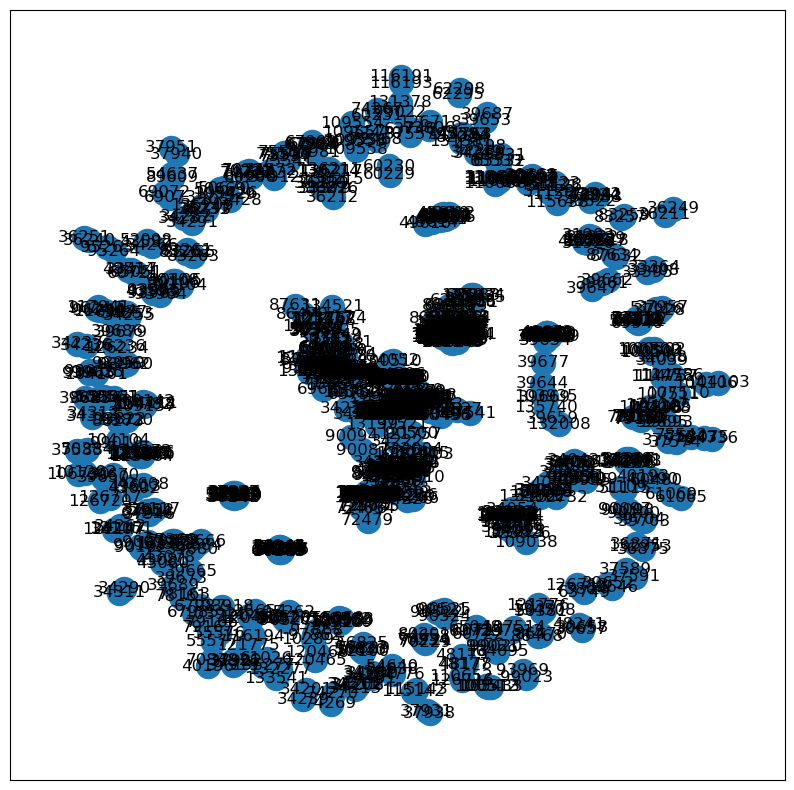

In [23]:
#Diplay the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(G)

plt.show() 

#Improve plot by following: https://networkx.org/documentation/stable/auto_examples/drawing/plot_weighted_graph.html

In [36]:
# Calculate metrics 
#Betweenness centrality
btw_centr=nx.betweenness_centrality(G,normalized=False, weight='Weight',endpoints=True)
btw_centr
#Source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

#Degree Centrality
dg_centr=nx.degree_centrality(G)
dg_centr
#Source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html

#Closeness Centrality
cls_centr=nx.closeness_centrality(G)
cls_centr
#Source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html

#harmonic_centrality
harmo_centr=nx.harmonic_centrality(G)

#Source: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

In [105]:
#Input the variables on a data frame to append back to a csv, problem (note all node will have a value).

bet=pd.DataFrame.from_records(btw_centr, index=[0]).T
bet.columns=bet.columns.astype(str).str.replace('0','Betweenness')
bet=bet.reset_index()
bet.columns=bet.columns.astype(str).str.replace('index','id')


degree=pd.DataFrame.from_records(dg_centr, index=[0]).T
degree.columns=degree.columns.astype(str).str.replace('0','degree_centrality')
degree=degree.reset_index()


sna_metrics = pd.merge(left=bet, right=degree[['index','degree_centrality']], how="left", left_on=['id'], right_on=['index'])


closeness=pd.DataFrame.from_records(cls_centr, index=[0]).T
closeness.columns=closeness.columns.astype(str).str.replace('0','closeness_centrality')
closeness=closeness.reset_index()

sna_metrics_2 = pd.merge(left=sna_metrics, right=closeness[['index','closeness_centrality']], how="left", left_on=['id'], right_on=['index'])


harmonic=pd.DataFrame.from_records(harmo_centr, index=[0]).T
harmonic.columns=harmonic.columns.astype(str).str.replace('0','harmonic_centrality')
harmonic=harmonic.reset_index()


sna_metrics_3 = pd.merge(left=sna_metrics_2, right=harmonic[['index','harmonic_centrality']], how="left", left_on=['id'], right_on=['index'])
sna_metrics_3=sna_metrics_3.drop(labels=['index','index_x','index_y'], axis=1)



output_filename42 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Notebooks/4. SNA/sna_metrics.csv'
sna_metrics_3.to_csv(output_filename42, index=False)


,id,Betweenness,degree_centrality,closeness_centrality,harmonic_centrality
0,30655,5.000000,0.005155,0.005155,5.000000
1,30657,2.000000,0.002062,0.002062,2.000000
2,30658,2.000000,0.002062,0.002062,2.000000
3,30668,5.000000,0.005155,0.005155,5.000000
4,30682,5.000000,0.005155,0.005155,5.000000
...,...,...,...,...,...
966,136266,1935.624975,0.063918,0.094636,122.459524
967,136272,7.000000,0.007216,0.007216,7.000000
968,136273,272.549513,0.042268,0.072547,96.960714
969,136276,7.000000,0.007216,0.007216,7.000000


#### 1.3.3 Now for directed edges

In [30]:
df.head(1)

,id,createTime,hashtags,tags,tags_full_name,tags_verified,isPaidPartnership,text,productType,InstagramUserId,...,s_tags,s_tags_full_name,s_tags_verified,mediaType,productType.1,InstagramUserId.1,fullName,username,isVerified,country
0,6822,2022-06-20 20:53:25+00,NaN,NaN,NaN,NaN,False,NaN,story,149,...,NaN,NaN,NaN,2,story,149,ᴘᴀʀᴛ ᴛɪᴍᴇ ᴘᴏᴇᴛ 🇮🇪,conorryan75,False,ireland


In [2]:
#Tags unique pre_count
df_dir_tag=df[["id","tags",]].copy()
df_dir_tag=df_dir_tag.dropna()

#Lets Split the data frame to obtain and split of the table
df_dir_tag_3=df_dir_tag.tags.copy()
df_dir_tag_3=df_dir_tag_3.str.split(";")
df_dir_tag_4=pd.DataFrame(df_dir_tag_3)
df_dir_tag_4.columns=df_dir_tag_4.columns.str.replace("tags","tags_pre_count")
tag_dir_split=pd.concat([df_dir_tag,df_dir_tag_4.set_index(df_dir_tag.index)],axis=1)


#Verify if the on tags, we have any full name
#Create a list of full name unique
tags_unique_test=[]

for i in range(len(tag_dir_split)):
    for x in range(len(tag_dir_split.iat[i,2])):
        tags_unique_test.append(tag_dir_split.iat[i,2][-x])

tags_unique_test_1=pd.DataFrame(tags_unique_test,columns=['tags'])
tags_unique_test_1=tags_unique_test_1.drop_duplicates(subset=["tags"], keep="first")

,id,tags,tags_pre_count
168,10087,warnerbrosirl,[warnerbrosirl]
170,10089,warnerbrosirl,[warnerbrosirl]
244,12394,greeensaregoodforyou,[greeensaregoodforyou]
306,12784,meagherspharmacy;oonaghohag;symproveyourlife,"[meagherspharmacy, oonaghohag, symproveyourlife]"
346,13070,rimmellondonuki,[rimmellondonuki]


In [6]:
#Tags unique pre_count
df_dir_user=df[["id","fullName",]].copy()
df_dir_user=df_dir_user.dropna()

#Verify if the on tags, we have any full name
#Create a list of full name unique
user_unique_test=[]

for i in range(len(df_dir_user)):
    user_unique_test.append(df_dir_user.iat[i,1])
user_unique_test_1=pd.DataFrame(user_unique_test,columns=['users'])
user_unique_test_1=user_unique_test_1.drop_duplicates(subset=["users"], keep="first")

In [29]:
# We will now count if any of the values are the same or correspond
comb_unique=[]
for i in range(len(tags_unique_test_1)):
    comb_unique.append((user_unique_test_1['users']==tags_unique_test_1.iat[i,0]).sum())
comb_unique=pd.DataFrame(comb_unique,columns=['count'])

tags_users=pd.concat([tags_unique_test_1,comb_unique.set_index(tags_unique_test_1.index)],axis=1)

tags_users['count'].value_counts()

0    29233
1        9
Name: count, dtype: int64

In [34]:
# Lets try now with tags full name instead of tags only
#Tags unique pre_count
df_dir_tag_ful=df[["id","tags_full_name",]].copy()
df_dir_tag_ful=df_dir_tag_ful.dropna()

#Lets Split the data frame to obtain and split of the table
df_dir_tag_ful_3=df_dir_tag_ful.tags_full_name.copy()
df_dir_tag_ful_3=df_dir_tag_ful_3.str.split(";")
df_dir_tag_ful_4=pd.DataFrame(df_dir_tag_ful_3)
df_dir_tag_ful_4.columns=df_dir_tag_ful_4.columns.str.replace("tags_full_name","tags_pre_count")
tag_dir_split_ful=pd.concat([df_dir_tag_ful,df_dir_tag_ful_4.set_index(df_dir_tag_ful.index)],axis=1)


#Verify if the on tags, we have any full name
#Create a list of full name unique
tags_unique_test_ful=[]

for i in range(len(tag_dir_split_ful)):
    for x in range(len(tag_dir_split_ful.iat[i,2])):
        tags_unique_test_ful.append(tag_dir_split_ful.iat[i,2][-x])

tags_unique_test_ful_1=pd.DataFrame(tags_unique_test_ful,columns=['tags'])
tags_unique_test_ful_1=tags_unique_test_1.drop_duplicates(subset=["tags"], keep="first")

In [36]:
# We will now count if any of the values are the same or correspond
comb_unique_1=[]
for i in range(len(tags_unique_test_ful_1)):
    comb_unique_1.append((user_unique_test_1['users']==tags_unique_test_ful_1.iat[i,0]).sum())
comb_unique_ful=pd.DataFrame(comb_unique_1,columns=['count'])

tags_ful_users=pd.concat([tags_unique_test_ful_1,comb_unique_ful.set_index(tags_unique_test_1.index)],axis=1)

tags_ful_users['count'].value_counts()

0    29233
1        9
Name: count, dtype: int64

In [47]:
tags_ful_users[tags_ful_users['count']>=1]

,tags,count
4993,paulo_vintem,1
6859,ritaferrorodrigues,1
12826,pizzi21,1
16517,marcocosta22,1
17482,nadiaforde,1
25885,voguewilliams,1
114797,anabravo.nutricionista,1
149092,ljubostanisic,1
197600,magazino,1


In [41]:
tags_ful_users.head()

,tags,count
0,warnerbrosirl,0
2,greeensaregoodforyou,0
3,meagherspharmacy,0
4,symproveyourlife,0
5,oonaghohag,0


##### Auxiliar calculations

In [ ]:
output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/2. SNA/nodes_data_points.csv'
tags_commom.to_csv(output_filename5, index=False)

In [ ]:
# Now for directed edges

In [87]:
print(f'The data set tags_commom are our edges dataset and has a total of {len(tags_commom[tags_commom.Weight > 2])} edges')

The data set tags_commom are our edges dataset and has a total of 1 edges


In [72]:
#Make two copies of the list
id_1=tags_only.id.copy()
id_2=tags_only.id.copy()

#Lets Mashup the information
from itertools import combinations
df_try_1=pd.DataFrame(list(combinations(id_1, 2)), columns=['id_1', 'id_2'])
print(df_try_1)

    id_1   id_2
0  37568  37571
1  37568  48661
2  37568  55589
3  37568  74269
4  37571  48661
5  37571  55589
6  37571  74269
7  48661  55589
8  48661  74269
9  55589  74269


In [60]:
#Now I need to drop the ones that are the same, drop rows where one and another are the same
df_try_2=df_try_1[df_try_1['id_1'] != df_try_1['id_2']]
# In need to extract from the data table, since they are not directed the lines that do not possess 
    # Lets concatenate to make an auxiliar column
df_try_2["Auxiliar"] = df_try_2['id_1'].astype(str) + df_try_2["id_2"].astype(str)
df_try_2["Auxiliar_2"] = df_try_2['id_2'].astype(str) + df_try_2["id_1"].astype(str)
    # Remove duplicates based on the auxiliar column
df_try_2=df_try_2[df_try_2['Auxiliar'] != df_try_2['Auxiliar_2']]
    #df_try_2=df_try_2.drop_duplicates(subset=["Auxiliar"], keep="first")
print(df_try_2)

     id_1   id_2    Auxiliar  Auxiliar_2
1   37568  37571  3756837571  3757137568
2   37568  48661  3756848661  4866137568
3   37568  55589  3756855589  5558937568
4   37568  74269  3756874269  7426937568
5   37571  37568  3757137568  3756837571
7   37571  48661  3757148661  4866137571
8   37571  55589  3757155589  5558937571
9   37571  74269  3757174269  7426937571
10  48661  37568  4866137568  3756848661
11  48661  37571  4866137571  3757148661
13  48661  55589  4866155589  5558948661
14  48661  74269  4866174269  7426948661
15  55589  37568  5558937568  3756855589
16  55589  37571  5558937571  3757155589
17  55589  48661  5558948661  4866155589
19  55589  74269  5558974269  7426955589
20  74269  37568  7426937568  3756874269
21  74269  37571  7426937571  3757174269
22  74269  48661  7426948661  4866174269
23  74269  55589  7426955589  5558974269


C:\Users\Casa\AppData\Local\Temp\ipykernel_11356\1423209901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try_2["Auxiliar"] = df_try_2['id_1'].astype(str) + df_try_2["id_2"].astype(str)
C:\Users\Casa\AppData\Local\Temp\ipykernel_11356\1423209901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_try_2["Auxiliar_2"] = df_try_2['id_2'].astype(str) + df_try_2["id_1"].astype(str)


In [68]:
(df_try_2['Auxiliar_2']==df_try_2.iat[0,2]).sum()

1

In [69]:
comb_unique=[]
for i in range(len(df_try_2)):
    comb_unique.append((df_try_2['Auxiliar_2']==df_try_2.iat[i,2]).sum())

print(comb_unique)
    
#comb_unique=pd.DataFrame(comb_unique)
#comb_unique.columns=comb_unique.columns.astype(str).str.replace("0","check_dup")
#df_try_2=pd.concat([df_try_2,comb_unique.set_index(df_try_2.index)],axis=1)

#df_try_2 = df_try_2[df_try_2['check_dup'] == 1]



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [50]:
tags_commom.head(5)

,Source,Target,tags_pre_count_Source,tags_pre_count_Target,Weight
0,37568,37571,[diogojrcoelho],[diogojrcoelho],1
1,37568,48661,[diogojrcoelho],[fermliving],0
2,37568,55589,[diogojrcoelho],[calzedonia],0
3,37568,74269,[diogojrcoelho],[artigoscommuitaqualidade],0
4,37571,37568,[diogojrcoelho],[diogojrcoelho],1


In [32]:
print(df_aux)

     id_1   id_2         tags_pre_count_id_1              tags_pre_count
0   37568  37571             [diogojrcoelho]             [diogojrcoelho]
1   37568  48661             [diogojrcoelho]                [fermliving]
2   37568  55589             [diogojrcoelho]                [calzedonia]
3   37568  74269             [diogojrcoelho]  [artigoscommuitaqualidade]
4   37571  37568             [diogojrcoelho]             [diogojrcoelho]
5   37571  48661             [diogojrcoelho]                [fermliving]
6   37571  55589             [diogojrcoelho]                [calzedonia]
7   37571  74269             [diogojrcoelho]  [artigoscommuitaqualidade]
8   48661  37568                [fermliving]             [diogojrcoelho]
9   48661  37571                [fermliving]             [diogojrcoelho]
10  48661  55589                [fermliving]                [calzedonia]
11  48661  74269                [fermliving]  [artigoscommuitaqualidade]
12  55589  37568                [calzedonia]       

In [42]:
res = sum(x == y for x, y in zip(df_aux.iloc[0,2], df_aux.iloc[0,3]))
res

1

In [43]:
id_tags_count=[]
for i in range(len(df_aux)):
    id_tags_count.append(sum(x == y for x, y in zip(df_aux.iat[i,2], df_aux.iat[i,3])))
id_tags_count

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [44]:
id_tags=pd.DataFrame(id_tags_count)

id_tags.columns=id_tags.columns.astype(str).str.replace("0","id")
tags_commom=pd.concat([df_aux,id_tags.set_index(df_aux.index)],axis=1)
tags_commom.head(5)

,id_1,id_2,tags_pre_count_id_1,tags_pre_count_id_2,id
0,37568,37571,[diogojrcoelho],[diogojrcoelho],1
1,37568,48661,[diogojrcoelho],[fermliving],0
2,37568,55589,[diogojrcoelho],[calzedonia],0
3,37568,74269,[diogojrcoelho],[artigoscommuitaqualidade],0
4,37571,37568,[diogojrcoelho],[diogojrcoelho],1


In [ ]:
df_aux.iloc[0,3]

In [16]:
c=(sample_one[['id']])
c.nunique()
print(sample_one.nunique())
print(len(df[['id']]))
df.nunique()

id                   1306
createTime           1306
hashtags               92
tags                  399
tags_full_name        396
tags_verified          72
isPaidPartnership       2
text                  932
productType             5
InstagramUserId         9
code                 1306
likeCount             195
commentCount           80
desc                  212
s_tags                  1
s_tags_full_name        1
s_tags_verified         1
mediaType               3
productType.1           5
InstagramUserId.1       9
fullName                9
username                9
isVerified              2
country                 1
dtype: int64
147893


id                   147893
createTime           144166
hashtags              12621
tags                  34635
tags_full_name        34263
tags_verified          2398
isPaidPartnership         2
text                  97203
productType               5
InstagramUserId         958
code                 147893
likeCount              8803
commentCount            871
desc                  27969
s_tags                  203
s_tags_full_name        203
s_tags_verified          57
mediaType                 3
productType.1             5
InstagramUserId.1       958
fullName                944
username                958
isVerified                2
country                   2
dtype: int64

SNA in Python
Source: https://towardsdatascience.com/identifying-influencers-on-social-media-a-guide-to-social-network-analysis-using-python-e05f4da151b8